In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('world-happiness-report-2021.csv')
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [60]:
df.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'], axis = 1, inplace = True)
df

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


In [63]:
df.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [66]:
num_df = df.select_dtypes(include = np.number)
num_df

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...
144,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


c:\users\gyanaranjan pradhan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


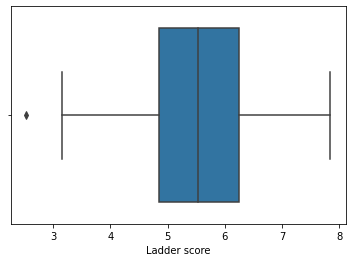

c:\users\gyanaranjan pradhan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


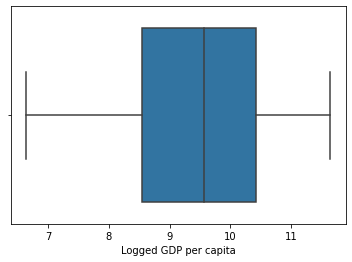

c:\users\gyanaranjan pradhan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


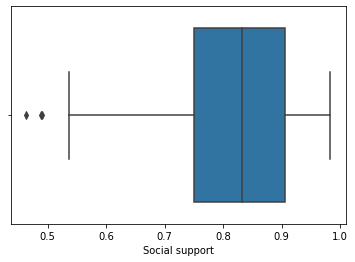

c:\users\gyanaranjan pradhan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


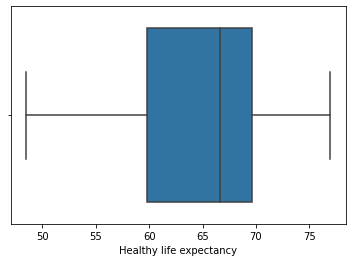

c:\users\gyanaranjan pradhan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


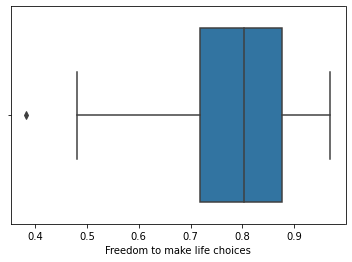

c:\users\gyanaranjan pradhan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


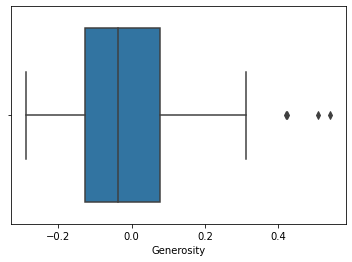

c:\users\gyanaranjan pradhan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


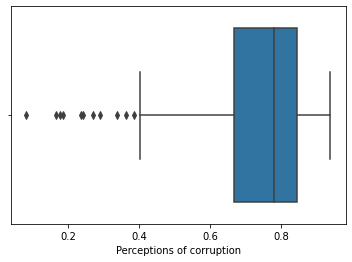

In [69]:
for i in range(len(num_df.columns)):
    sns.boxplot(num_df.iloc[:,i])
    plt.show()

<AxesSubplot:>

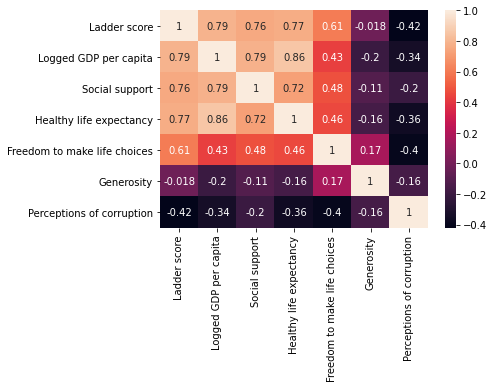

In [72]:
sns.heatmap(num_df.corr(), annot = True)

In [92]:
df['Regional indicator'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

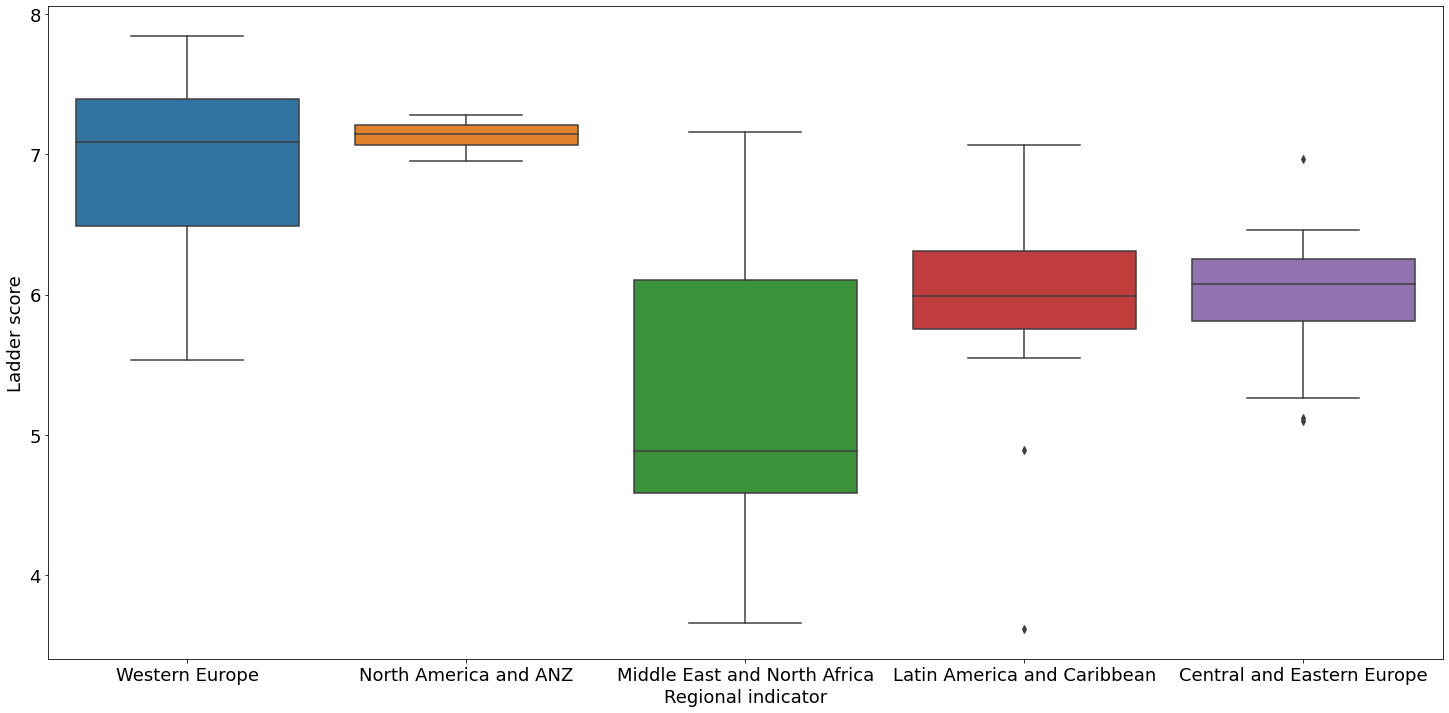

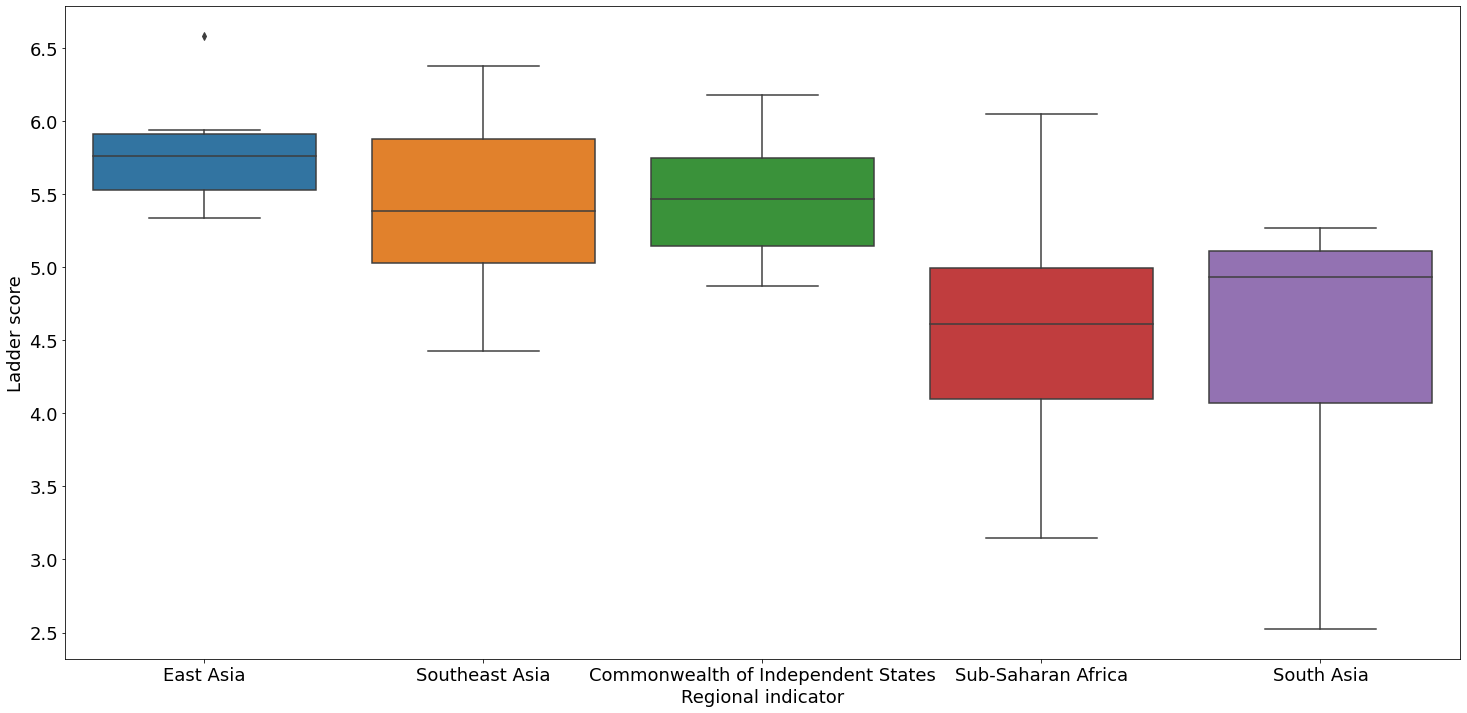

In [102]:
plt.figure (figsize=(25, 12))
plt.rcParams.update({'font.size': 18})
sns.boxplot(x = 'Regional indicator', y = 'Ladder score', data = df, order =['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe'])
plt.show()
plt.figure (figsize=(25, 12))
plt.rcParams.update({'font.size': 18})
sns.boxplot(x = 'Regional indicator', y = 'Ladder score', data = df, order =['East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'])
plt.show()

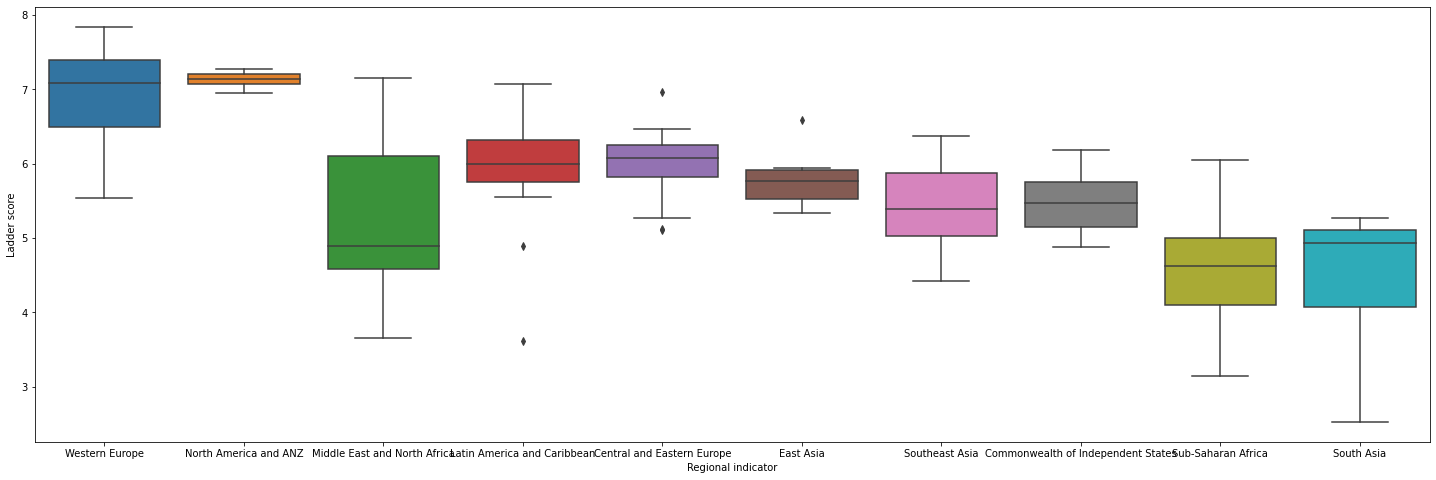

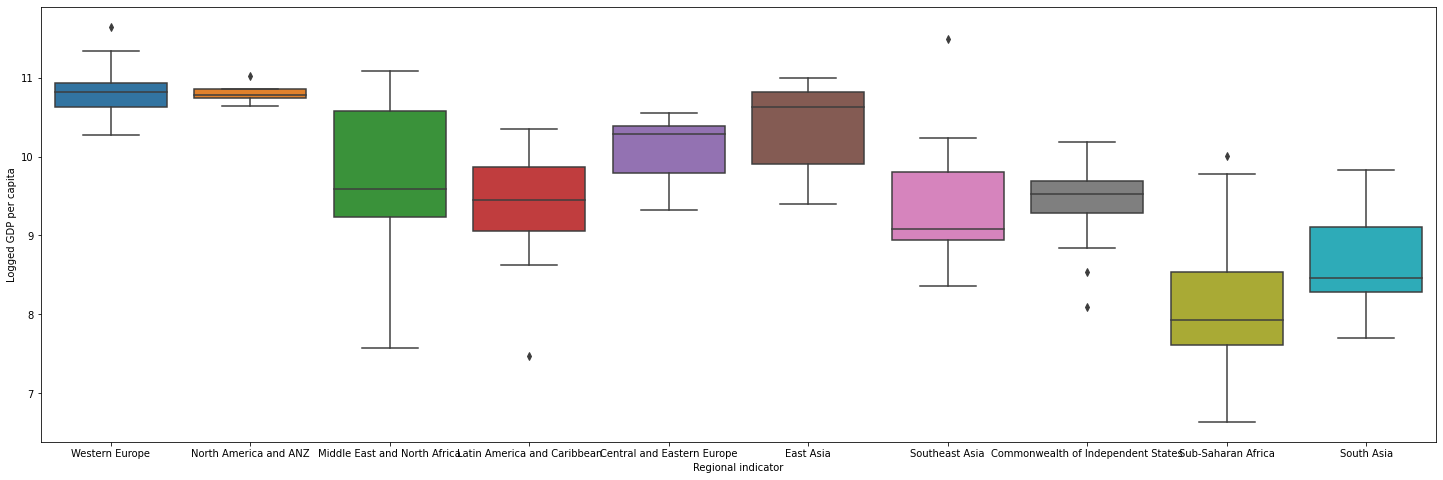

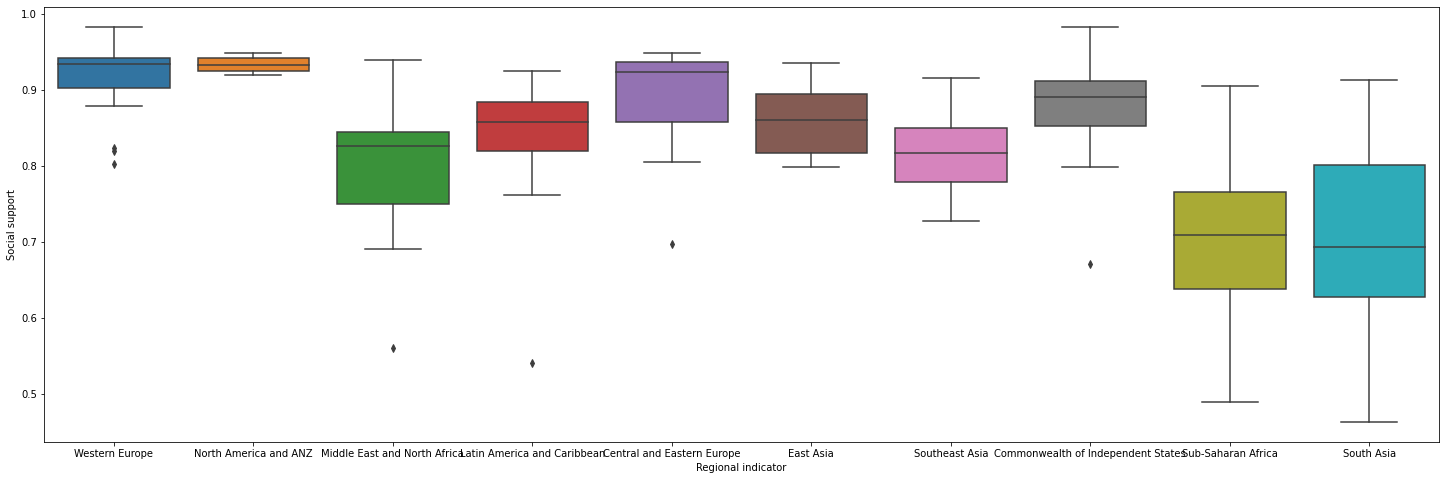

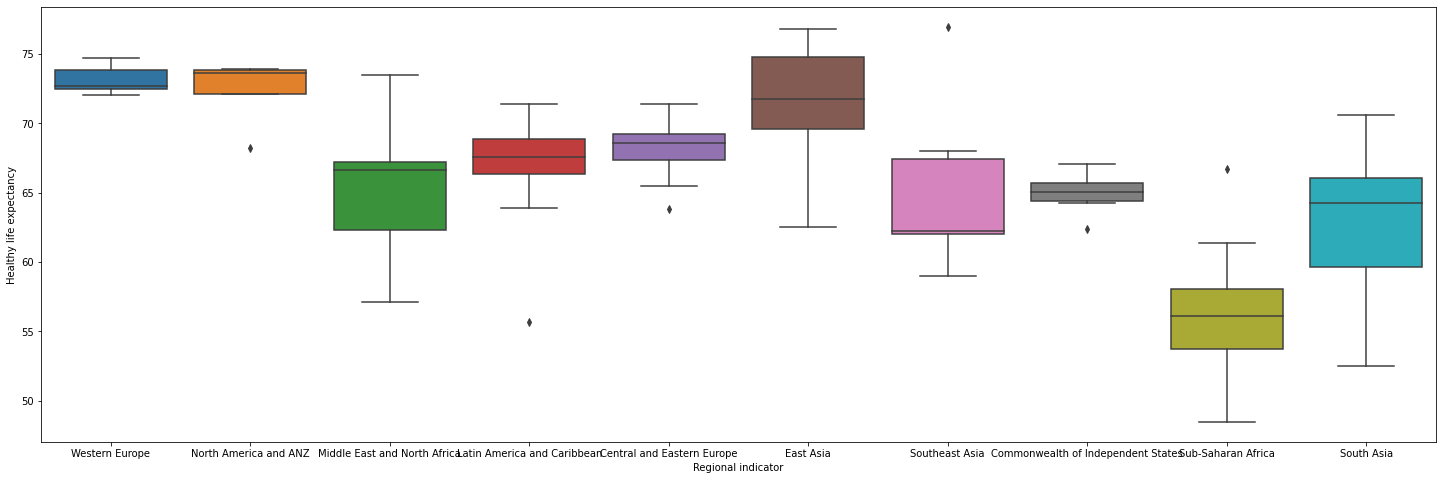

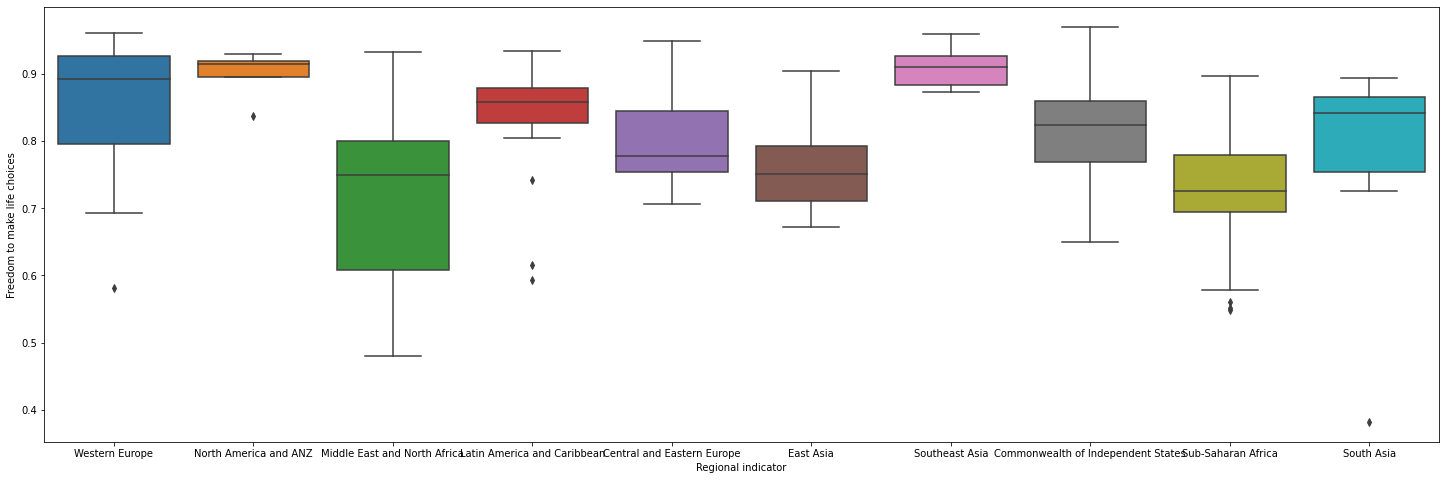

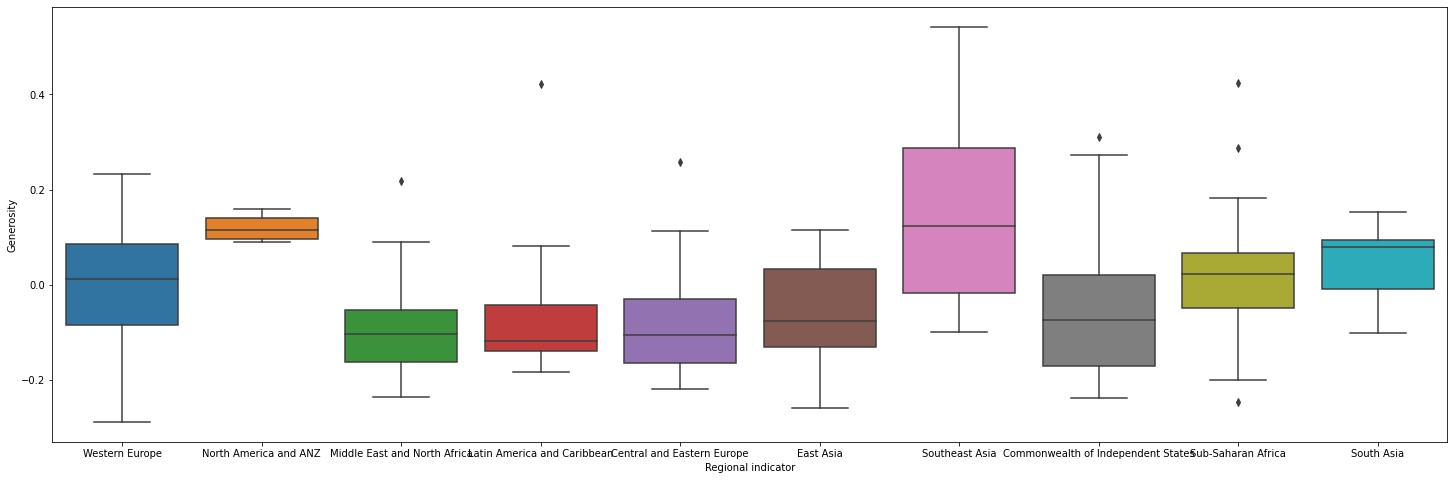

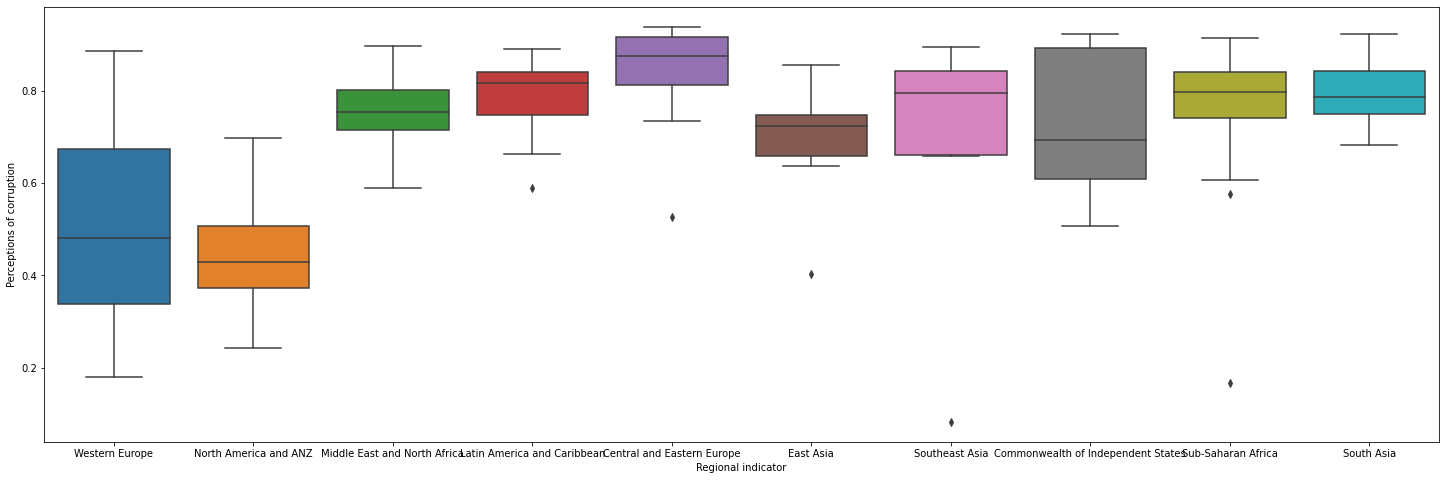

In [110]:
for i in range(len(num_df.columns)):
    plt.figure (figsize=(25, 8))
    plt.rcParams.update({'font.size': 10})
    sns.boxplot(x = df['Regional indicator'], y = num_df.iloc[:,i])
    plt.show()

In [112]:
sa = df[df['Regional indicator'] == 'South Asia']
sa

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
86,Nepal,South Asia,5.269,8.120,0.774,64.233,0.782,0.152,0.727
88,Maldives,South Asia,5.198,9.826,0.913,70.600,0.854,0.024,0.825
100,Bangladesh,South Asia,5.025,8.454,0.693,64.800,0.877,-0.041,0.682
104,Pakistan,South Asia,4.934,8.458,0.651,58.709,0.726,0.098,0.787
128,Sri Lanka,South Asia,4.325,9.470,0.827,67.299,0.841,0.079,0.863
138,India,South Asia,3.819,8.755,0.603,60.633,0.893,0.089,0.774
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


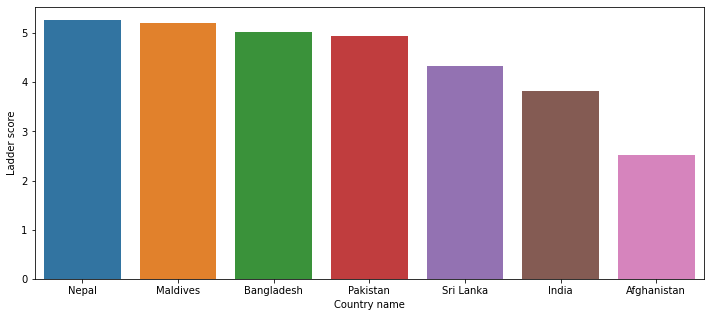

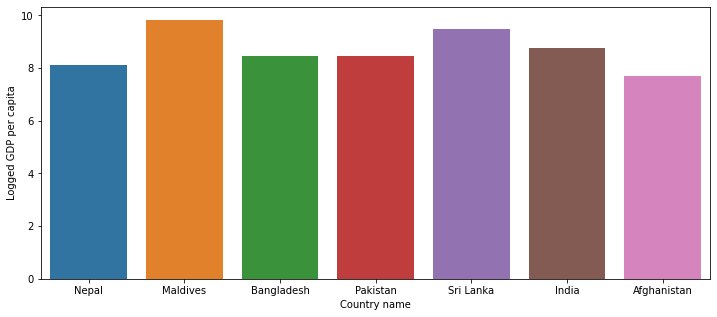

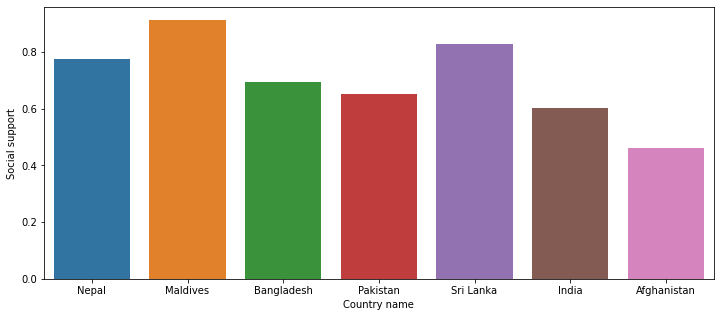

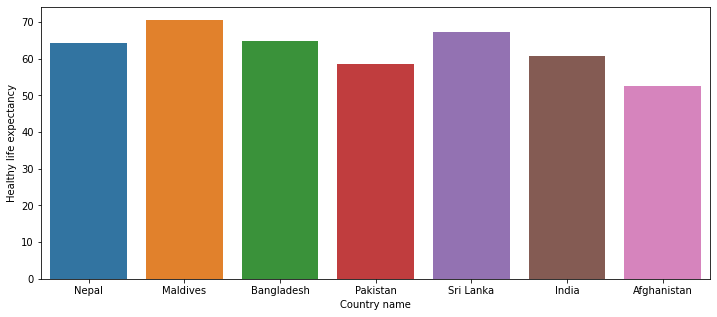

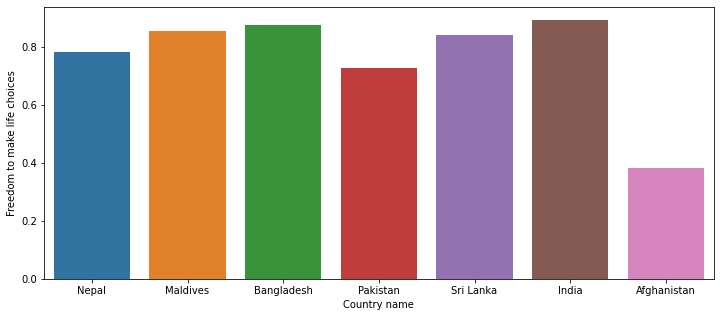

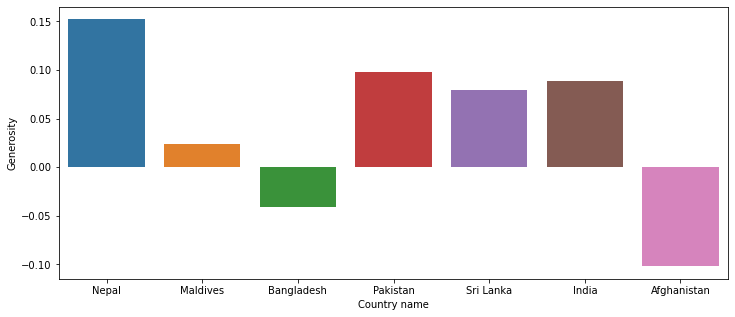

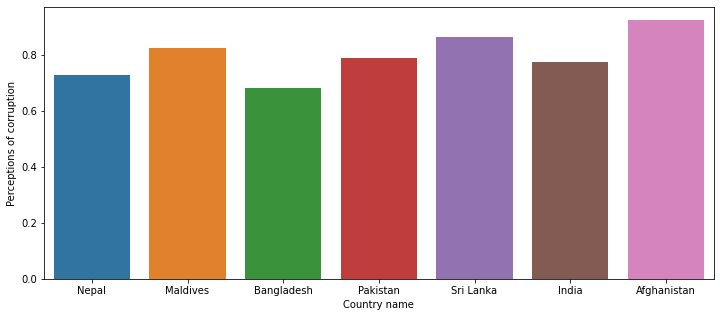

In [116]:
for i in range(2, len(sa.columns)):
    plt.figure (figsize = (12, 5))
    sns.barplot(x = sa['Country name'], y = sa.iloc[:,i])
    plt.show()

In [122]:
g = df.groupby(by = 'Regional indicator')
g.count()

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Regional indicator,,,,,,,,
Central and Eastern Europe,17,17,17,17,17,17,17,17
Commonwealth of Independent States,12,12,12,12,12,12,12,12
East Asia,6,6,6,6,6,6,6,6
Latin America and Caribbean,20,20,20,20,20,20,20,20
Middle East and North Africa,17,17,17,17,17,17,17,17
North America and ANZ,4,4,4,4,4,4,4,4
South Asia,7,7,7,7,7,7,7,7
Southeast Asia,9,9,9,9,9,9,9,9
Sub-Saharan Africa,36,36,36,36,36,36,36,36


In [131]:
g['Healthy life expectancy'].min()

Regional indicator
Central and Eastern Europe            63.813
Commonwealth of Independent States    62.409
East Asia                             62.500
Latin America and Caribbean           55.700
Middle East and North Africa          57.122
North America and ANZ                 68.200
South Asia                            52.493
Southeast Asia                        58.968
Sub-Saharan Africa                    48.478
Western Europe                        72.000
Name: Healthy life expectancy, dtype: float64

In [125]:
g.get_group('Latin America and Caribbean')

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
15,Costa Rica,Latin America and Caribbean,7.069,9.880,0.891,71.400,0.934,-0.126,0.809
29,Guatemala,Latin America and Caribbean,6.435,9.053,0.813,64.958,0.906,-0.038,0.775
30,Uruguay,Latin America and Caribbean,6.431,9.966,0.925,69.100,0.896,-0.092,0.590
34,Brazil,Latin America and Caribbean,6.330,9.577,0.882,66.601,0.804,-0.071,0.756
35,Mexico,Latin America and Caribbean,6.317,9.859,0.831,68.597,0.862,-0.147,0.799
36,Jamaica,Latin America and Caribbean,6.309,9.186,0.877,67.500,0.890,-0.137,0.884
40,Panama,Latin America and Caribbean,6.180,10.350,0.896,69.652,0.872,-0.166,0.856
42,Chile,Latin America and Caribbean,6.172,10.071,0.882,70.000,0.742,-0.044,0.830
48,El Salvador,Latin America and Caribbean,6.061,9.054,0.762,66.402,0.888,-0.110,0.688
51,Colombia,Latin America and Caribbean,6.012,9.557,0.847,68.001,0.837,-0.135,0.841
